Summary:
- 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import describe

In [2]:
from assess_property.fit_learner import MakeExperiment

# Make data frame of features and response

In [3]:
df, _, _ = MakeExperiment()

100%|██████████| 10/10 [00:14<00:00,  1.40s/it]


# Missingness 
All columns have some degree of missingness.
The only column with a worrying amount is YR_REMODEL: there are almost $90\%$ of entries missing.

In [4]:
100*(df.isna().sum())/len(df.index)

PID                              0.000000
YR_BUILT                         0.009814
LIVING_AREA                      0.002290
LU                               0.000000
ZIPCODE                          0.000000
TOTAL_VALUE                      0.000000
YEAR                             0.000000
YR_REMODEL                      87.844906
TOTAL_VALUE_IN_HUNDRED_GRAND     0.000000
dtype: float64

# Visualize features and response

## Moment summaries (mean, variance, kurtosis)

In [5]:
df.describe()

,YR_BUILT,LIVING_AREA,TOTAL_VALUE,YEAR,YR_REMODEL,TOTAL_VALUE_IN_HUNDRED_GRAND
count,305669.000000,305692.000000,3.056990e+05,305699.000000,37158.000000,305699.000000
mean,1927.265434,1759.319437,5.910847e+05,2018.491752,2005.079875,5.910847
std,35.133661,762.505956,7.088388e+05,2.872667,13.710284,7.088388
min,1800.000000,0.000000,8.490000e+04,2014.000000,1900.000000,0.849000
25%,1900.000000,1306.000000,3.462000e+05,2016.000000,2000.000000,3.462000
50%,1925.000000,1591.000000,4.531000e+05,2018.000000,2008.000000,4.531000
75%,1950.000000,2010.000000,6.095000e+05,2021.000000,2015.000000,6.095000
max,2022.000000,22159.000000,3.014300e+07,2023.000000,2022.000000,301.430000


Three columns exhibit high (> 50) kurtosis: 
- TOTAL_VALUE (and its scaled versoin, TOTAL_VALUE_IN_HUNDRED_GRAND)
- LIVING_ARE

In [6]:
df.kurtosis(numeric_only=True)

YR_BUILT                          0.137751
LIVING_AREA                      50.073726
TOTAL_VALUE                     201.024577
YEAR                             -1.224538
YR_REMODEL                        3.588943
TOTAL_VALUE_IN_HUNDRED_GRAND    201.024577
dtype: float64

## Pairs plot

LIVING_AREA and TOTAL_VALUE_IN_HUNDRED_GRAND have positive correlation.
YEAR and TOTAL_VALUE_IN_HUNDRED_GRAND also have positive correlation.m

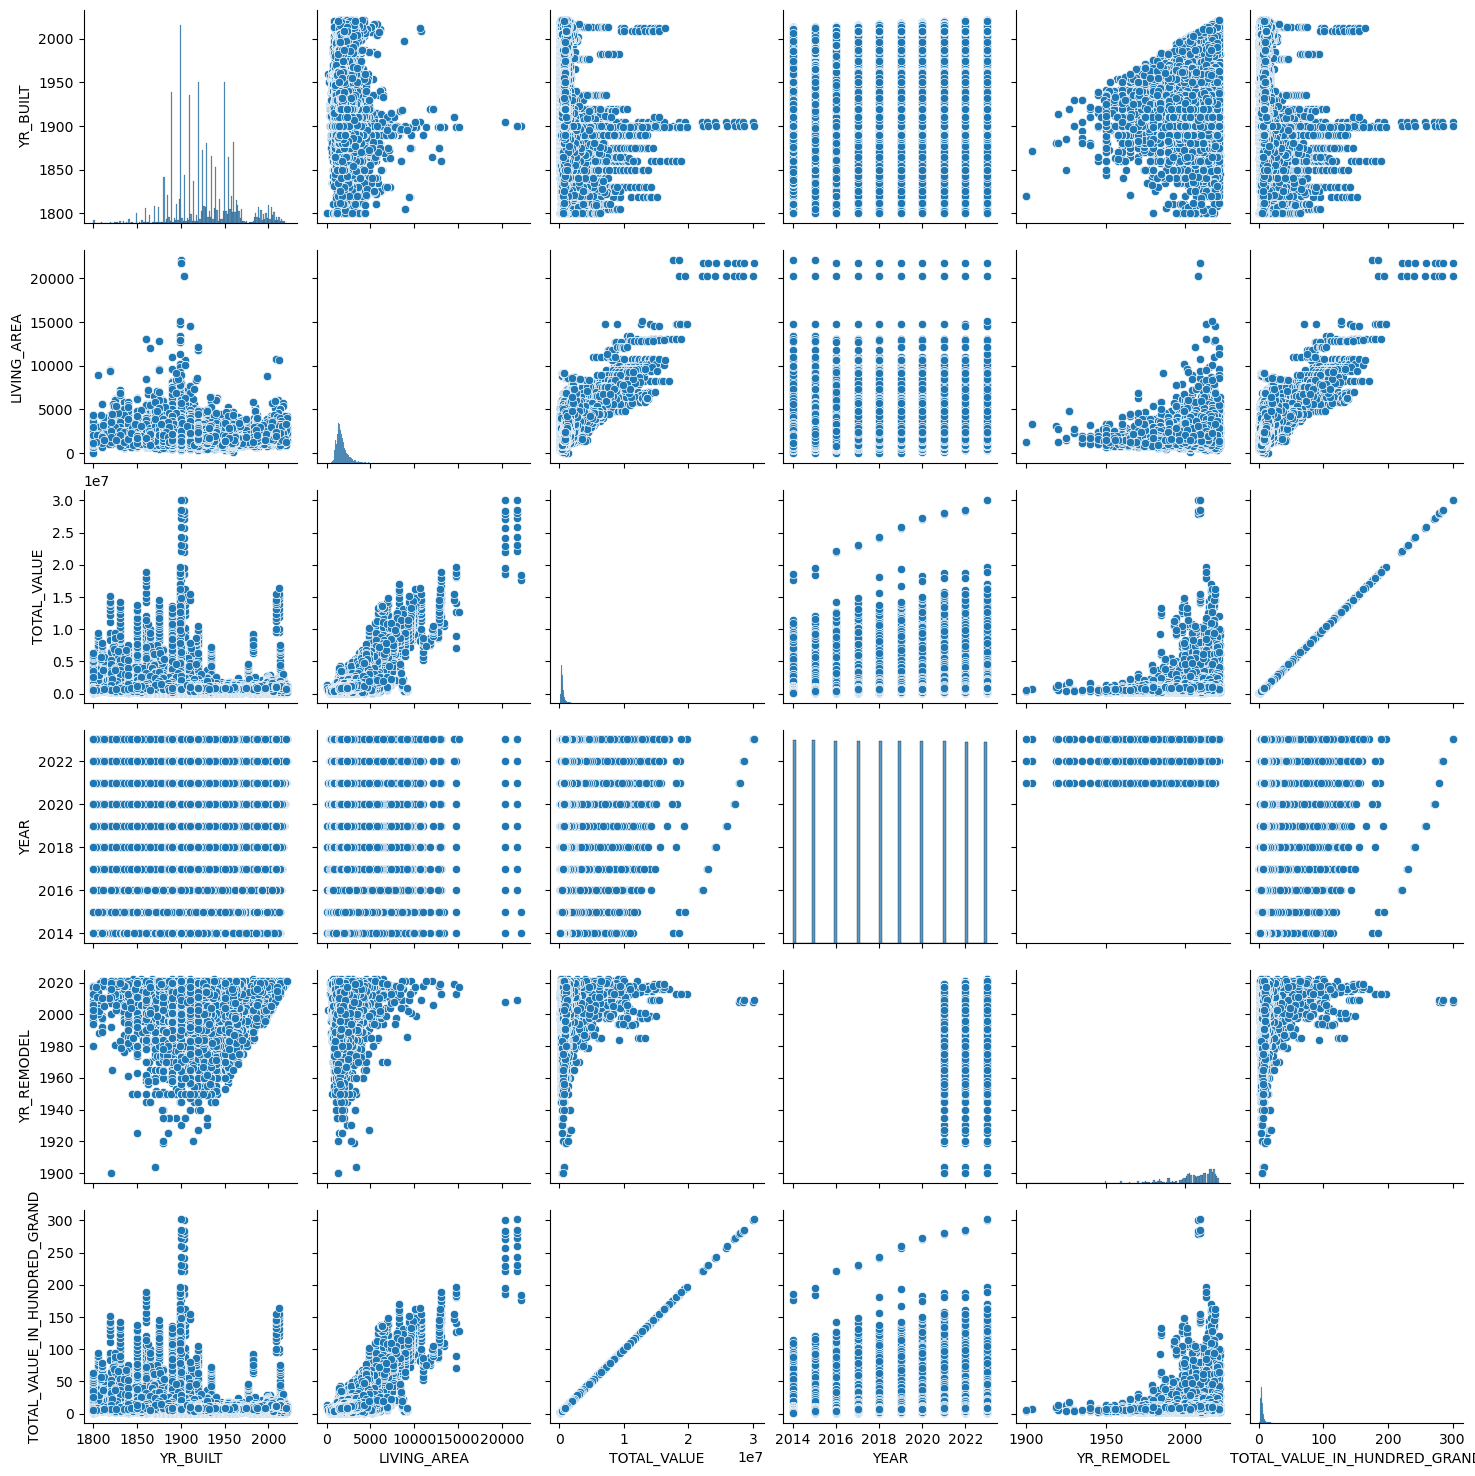

In [8]:
sns.pairplot(df)
plt.savefig("../figures/pairsplot.jpg")
plt.show()

## Correlation matrix

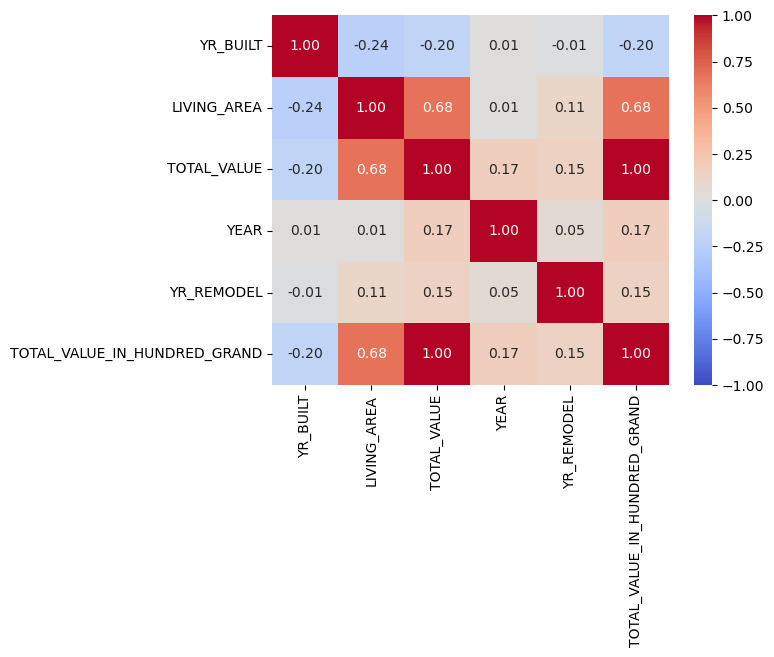

In [9]:
cormat = df.corr(numeric_only=True)
sns.heatmap(cormat,
            annot = True,
            cmap = "coolwarm",
            vmin = -1, vmax = 1,
            fmt = ".2f")
plt.savefig("../figures/corrplot.jpg")
plt.show()